<center>
    <h1>Trabalho Prático 02 – Engenharia de Atributos e Ajustes de Modelos </h1>
    <h2>Adriano Marques Martins 02640</h2>
</center> 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
warnings.filterwarnings('ignore')

<p>Abrindo os arquivos de treino e teste disponibilizados pelo KAGGLE em <a href="https://www.kaggle.com/c/titanic"> TITANIC </a>. </p>

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h2 id="t1">Informações do Kaggle sobre os dados</h2>

<b>pclass</b>: uma proxy para o status socioeconômico (SES) 1st = Upper 2nd = Middle 3rd = Lower 

<b>idade</b>: a idade é fracionária se for menor que 1. Se a idade for estimada, é na forma de xx.5 

<b>sibsp</b>: O conjunto de dados define as relações familiares dessa maneira ... Sibling = irmão, irmã, meio-irmão, meia-irmã Spouse = marido, esposa (amantes e noivos foram ignorados) 

<b>parch</b>: O conjunto de dados define as relações familiares dessa maneira ... Pai = mãe, pai Criança = filha, filho, enteada, enteado Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas. 

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

Na própria descrição sobre os dados, o KAGLLE dá alguma informações importantes que podem ser acessadas em <a href="https://www.kaggle.com/c/titanic/data">DADOS TITANIC</a> e em seguida em <a href="https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/"> feature engineering</a> que descrevem algums dicas sobre as engenharia de atributos. Dentre essas dicas estão os nomes dos passageiros, a cabine e algumas interações entre os atributos. 

Agora será visualizada os dados de treino e teste contidos nos arquivos disponibilizados. 

In [47]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


<h2 id="oi">Analisando os Dados</h2>

<P>Visualisando informações básicas sobre os dados</P>

In [49]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

<p>Visualizando as estatística básicas dos dados</p>

In [50]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Charters, Mr. David",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [51]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Keane, Mr. Daniel",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


<p>Verificando a existência de valores Nulos ou NaN</p>

In [52]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<h2>Engenharia de atributos e Análise de Dados</h2>

convertendo os valores de String em valores númericos categóricos, sendo mulher-0 e Homem-1. Em seguida visualisando qual dos atributos tem maior probabilidade de sobreviver ao desastre. 

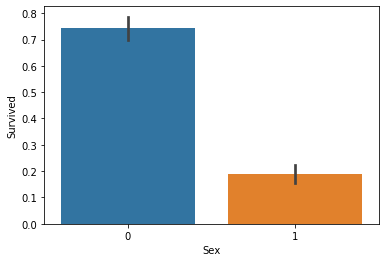

In [53]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
sns.barplot(x="Sex", y="Survived", data=train)

<p>Pclass, SibSp e Parch já são atributos númericos discretos e categóricos, onde não é necessário um tratamento.</p>

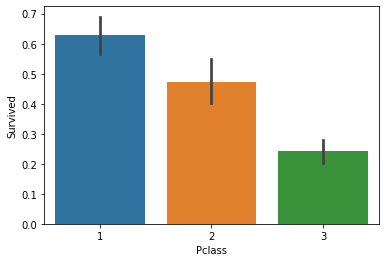

In [54]:
sns.barplot(x="Pclass", y="Survived", data=train)

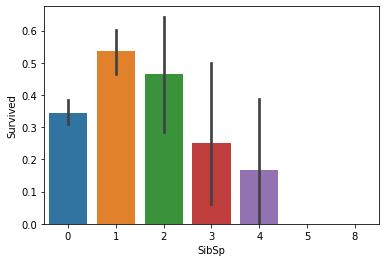

In [55]:
sns.barplot(x="SibSp", y="Survived", data=train)

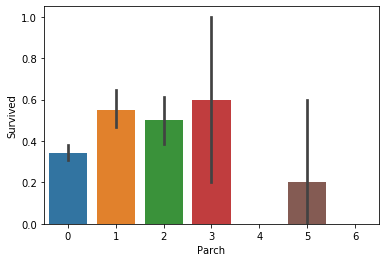

In [56]:
sns.barplot(x="Parch", y="Survived", data=train)

<p>A idade contém valores nulos, portanto os NaN foram substituídos por valores Negativos. Em seguidas é criado Bins para as idades, separados em 8 categórias, onde a primeira fica para as idades desconhecidas, em seguidas, foi dividido em possíveis idades para bebês, crianças, adolescentes, jovens, jovem-adulto, adultos e idosos.</p>

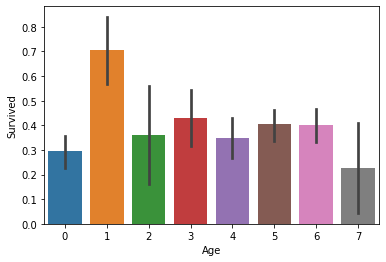

In [57]:
train["Age"] = train["Age"].fillna(-1)
test["Age"] = test["Age"].fillna(-1)

bins = [-2, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6, 7]

train['Age'] = pd.cut(train["Age"], bins, labels = labels)
test['Age'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="Age", y="Survived", data=train)
plt.show()

<p>Como pesquisado anteriormente as cabines possuem uma letra inicial e um valor numérico,
onde a letra representa um setor onde se encontra a cabine no navio. Para isso é feita uma função para extrair somente a letra da String.</p>

<b>Deck: we have a ‘Cabin’ column not doing much, only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these just like the titles.</b>

<p>Outra informações é que aqueles que possuem cabines registradas tem mais chance de sobreviver que aqueles que não possuem. Portanto seria interessante manter essa informação como pode ser visto abaixo.</p>

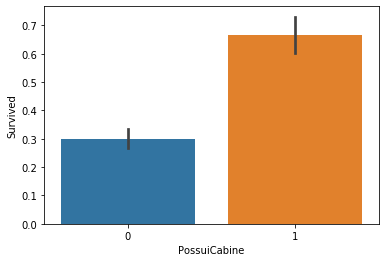

In [58]:
train["PossuiCabine"] = (train["Cabin"].notnull().astype('int'))
test["PossuiCabine"] = (test["Cabin"].notnull().astype('int'))
sns.barplot(x="PossuiCabine", y="Survived", data=train)

<p>Visualisando todas as cabines ocupadas nos dados de treino, com isso podemos tirar as letras utilizadas,
além de observar que o passageiro pode ter em mais de uma cabine ao mesmo tempo. Mas irei considerar apenas a primeira cabine, uma vez que são excessões.</p>

In [59]:
for x in train[train["Cabin"].notnull()]['Cabin']:
    print(x, end="; ")

C85; C123; E46; G6; C103; D56; A6; C23 C25 C27; B78; D33; B30; C52; B28; C83; F33; F G73; C23 C25 C27; E31; A5; D10 D12; D26; C110; B58 B60; E101; D26; F E69; D47; C123; B86; F2; C2; E33; B19; A7; C49; F4; A32; F2; B4; B80; G6; A31; D36; D15; C93; C83; C78; D35; G6; C87; B77; E67; B94; C125; C99; C118; D7; A19; B49; D; C22 C26; C106; B58 B60; E101; C22 C26; C65; E36; C54; B57 B59 B63 B66; C7; E34; C32; D; B18; C124; C91; C2; E40; T; F2; C23 C25 C27; F33; C128; E33; D37; B35; E50; C82; B96 B98; D36; G6; C78; E10; C52; E44; B96 B98; C23 C25 C27; A34; C104; C111; C92; E38; D21; E12; E63; D; A14; B49; C93; B37; C30; D20; C22 C26; B79; C65; E25; D46; F33; B73; B18; C95; B38; B39; B22; C86; C70; A16; E67; C101; E25; E44; C68; A10; E68; B41; D20; A20; C125; F4; D19; D50; D9; A23; B50; B35; D33; A26; D48; E58; C126; B71; B51 B53 B55; D49; B5; B20; C68; F G63; C62 C64; E24; E24; C90; C124; C126; F G73; C45; E101; E8; B5; B101; D45; C46; B57 B59 B63 B66; B22; D30; E121; B77; B96 B98; D11; E77; F

Função find em python <a href="https://www.tutorialspoint.com/python/string_find.htm"> FIND </a>

In [60]:
def substring(string, substrings):
    for sub in substrings: 
        if(str(string).find(sub) != -1):
            return sub
    return 'U'            

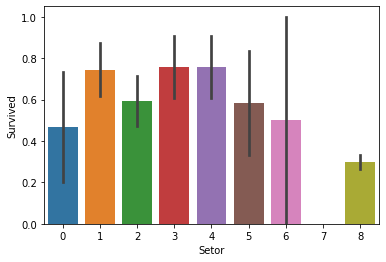

In [61]:
setores = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'U']

train['Setor']=train['Cabin'].map(lambda x: substring(x,setores))
test['Setor']=test['Cabin'].map(lambda x: substring(x,setores))

train['Setor'] = le.fit_transform(train['Setor'])
test['Setor'] = le.fit_transform(test['Setor'])

sns.barplot(x="Setor", y="Survived", data=train)
#for x in train["Setor"]:
#    print(x, end="; ")

<p>O próximo dado contém valores nulos, entratando como a classe denominada S é significativamente mais comum
 que as demais classes, os valores nulos, que são pouquissímos (2) tem grande probabilidade de pertencer a esse grupo.
Em seguida é feito o mapeamento para o valor númerico categórico.</p>

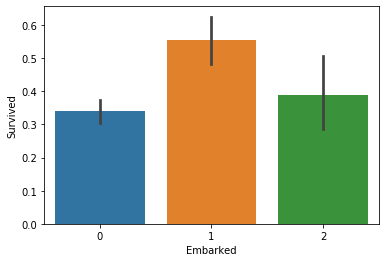

In [62]:
train['Embarked'] = train['Embarked'].fillna('S') # é o mais comum 
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test['Embarked'] = test['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

sns.barplot(x="Embarked", y="Survived", data=train)

<p>Assim como a idade, com o atributo Fare também foi feita em Bins, mas opetei por seguir os valores dos quartis, sendo 0% = 0, 25% = 7, 50% = 14, 75% = 31, 100% = 512. Além disso, para os valores nulos foi considerada a mediana, uma vez que são poucos valores.</p>

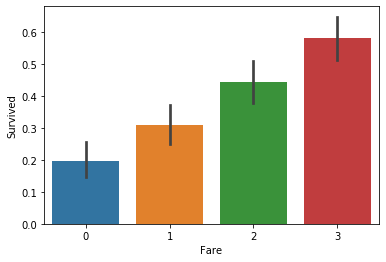

In [63]:
train["Fare"] = train["Fare"].fillna(14.45)
test["Fare"] = test["Fare"].fillna(14.45)

bins = [-1, 7.9, 14.45, 31, np.inf]
labels = [0, 1, 2,3 ]

train['Fare'] = pd.cut(train["Fare"], bins, labels = labels)
test['Fare'] = pd.cut(test["Fare"], bins, labels = labels)

sns.barplot(x="Fare", y="Survived", data=train)

<P>O Atributo nome também possui informação como observado na descrição dos dados. Essas informação diz respeito ao título
social da pessoa, como senhor, senhora, senhorita, mestre dentre outros. Para isso vamos usar um a mesma função criada anteriormente para extrair apenas o título social do nome. Mas antes precisamos visulizar todos os possíveis títulos sociais.</P>

In [64]:
for x in train[train["Name"].notnull()]['Name']:
    print(x)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

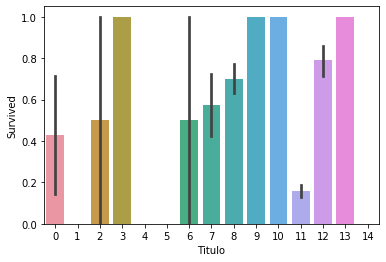

In [65]:
#Montvila, Rev. Juozas
#Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
titulos=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',' Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess','Don', 'Jonkheer']

train['Titulo']=train['Name'].map(lambda x: substring(x, titulos))
test['Titulo']=test['Name'].map(lambda x: substring(x, titulos))

train['Titulo'] = le.fit_transform(train['Titulo'])
test['Titulo'] = le.fit_transform(test['Titulo'])

sns.barplot(x="Titulo", y="Survived", data=train)

<h2>Ajustando o Modelo</h2>

Como selecionado em sala irei utilizar o AdaBoost e ajustar os seus parâmetros para classificar entre sobrevivente e não sobrevivente. 

No primeiro passo, irei criar um DF chamado P que conterá as colunas dos dados de treino, removendo a coluna alvo que queremos prever, o PassengerId que apenas numera os passageiros, o nome uma vez que extraímos os títulos socias, o Ticket que não contém informação útil, e Cabin, uma vez que criamos outro atributo extraindo o setor de onde se encontra a cabine do passageiro. 

In [66]:
p = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
t = train["Survived"]

Abaixo é feita vários ajustes nos hiperparametros afim de encontrar o melhor modelo, e é feita a validação cruzada para ver a eficácia do modelo gerado. 

In [67]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81599 (+/- 0.03)


In [68]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81485 (+/- 0.03)


In [69]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80693 (+/- 0.02)


In [70]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=200, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81374 (+/- 0.03)


In [71]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=10, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80580 (+/- 0.03)


In [72]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=7)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81485 (+/- 0.03)


In [73]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.5,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81491 (+/- 0.05)


In [74]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.3,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82497 (+/- 0.03)


In [75]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.3,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80809 (+/- 0.03)


In [76]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.1,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82162 (+/- 0.05)


In [77]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.1,
                   n_estimators=200, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81936 (+/- 0.04)


In [78]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.1,
                   n_estimators=200, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81262 (+/- 0.04)


In [79]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(max_depth=2), learning_rate=1.1,
                   n_estimators=200, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82727 (+/- 0.06)


In [80]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(max_depth=2), learning_rate=0.5,
                   n_estimators=200, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81378 (+/- 0.05)


In [81]:
clf = AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(max_depth=3), learning_rate=0.3,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82386 (+/- 0.04)


In [82]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=RandomForestClassifier(max_depth=5), learning_rate=0.1,
                   n_estimators=50, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83958 (+/- 0.07)


In [83]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=RandomForestClassifier(max_depth=5), learning_rate=0.1,
                   n_estimators=40, random_state=None)
scores = cross_val_score(clf,p, t, cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83285 (+/- 0.06)


 <h2>Gerando o Modelo</h2>
    
 
 Após escolher o melhor modelo, finalmente é realizado o treinamento com todos os dados de treino e Testando o modelo com os dados de teste. 

In [84]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=RandomForestClassifier(max_depth=5), learning_rate=0.1,
                   n_estimators=50, random_state=None)
clf.fit(p,t)
ts = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
pred = clf.predict(ts)

Gerando o arquivo de saída com as classificações feitas pelo modelo para ser enviada a submissão

In [85]:
dfPred = pd.read_csv('test.csv')
saida = pd.DataFrame({
        "PassengerId": dfPred["PassengerId"],
        "Survived": pred
    })
saida.to_csv('titanic_submission.csv', index=False)
dfSaida = pd.read_csv('titanic_submission.csv')


<h2>AUTOML</h2>
Para o autoML foi usada o auto_ml que pode ser acessado em <a href="https://pypi.org/project/automl/">AUTOML</a>. Gerado o arquivo de saída e enviada a submissão para o site KAGGLE. 

In [86]:
from auto_ml import Predictor
from auto_ml.utils_models import load_ml_model

Primero é testado o AUTOML com os dados "Limpos" e logo em seguida é testado com os dados brutos para averiguar se o mesmo consegue ser superior sem ajuda.

In [88]:
column_descriptions = {
    'Survived': 'output',
    'Pclass': 'categorical',
    'Sex': 'categorical',
    'Age': 'categorical',
    'SibSp': 'categorical',
    'Parch': 'categorical',
    'Fare': 'categorical',
    'Cabin': 'ignore',
    'Embarked': 'categorical',
    'name' : 'ignore',
    'PassengerId' : 'ignore',
    'Ticket' : 'ignore'
}

ml_predictor = Predictor(type_of_estimator='classifier', column_descriptions=column_descriptions)

x_train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
x_test = test

ml_predictor.train(x_train)

file_name = ml_predictor.save()
trained_model = load_ml_model(file_name)
predictions = trained_model.predict(x_test)


Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingClassifier to predict Survived
Started at:


In [89]:
dfPred = pd.read_csv('test.csv')
saida = pd.DataFrame({
        "PassengerId": dfPred["PassengerId"],
        "Survived": predictions 
    })
saida.to_csv('titanic_submissionAutoML0.csv', index=False)
dfSaida = pd.read_csv('titanic_submissionAutoML.csv')

In [90]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Após abrir onovamente os arquivos e carregá-los, é selecionada quais colunas serão utilizadas pelo AUTOML, e nesse caso, por repetidos erros o atributo nome e Cabin foram ignorados por não conseguir tratar as String, apesar de haver a opção "npl". Em seguida é mostrado o resultado final da acurácia para os dados de treino e já é realizada a predição com os dados de testes gerando os arquivos para a submissão para o KAGGLE. 

In [91]:
column_descriptions = {
    'Survived': 'output',
    'Pclass': 'categorical',
    'Sex': 'categorical',
    'Age': 'categorical',
    'SibSp': 'categorical',
    'Parch': 'categorical',
    'Fare': 'categorical',
    'Cabin': 'ignore',
    'Embarked': 'categorical',
    'Titulo': 'categorical',
    'PossueCabine': 'Categorical',
    'Setor': 'Categorical'
    
  
}
ml_predictor = Predictor(type_of_estimator='classifier', column_descriptions=column_descriptions)

x_train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

ml_predictor.train(x_train)

file_name = ml_predictor.save()
trained_model = load_ml_model(file_name)
predictions = trained_model.predict(test)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingClassifier to predict Survived
Started at:


In [92]:
dfPred = pd.read_csv('test.csv')
saida = pd.DataFrame({
        "PassengerId": dfPred["PassengerId"],
        "Survived": predictions 
    })
saida.to_csv('titanic_submissionAutoML.csv', index=False)
dfSaida = pd.read_csv('titanic_submissionAutoML.csv')

## CONCLUSÃO

Dada a primeira submissão <b>0.62679</b> sem alteração nos atributos, houve uma significativa melhora apenas usando bins nos atributos Age e Fare, onde a melhor submissão chegou a <b>0.77033</b> (Este foi a versão submetida no primero Trabalho prático). Apesar deste trabalho abordar uma melhor utilização dos atributos, considerando titulos sociais ou setores das atuais cabines o melhor resultado alcançado foi de <b>0.75598</b>. Lembrando que o algoritmo utilizado na entrega do primeiro TP foi o SVM, enquanto este apresenta o modelo gerado pelo AdaBoost. 

Quanto ao automl o mesmo foi aplicado de duas formas, a primeira utilizando os dados com a engenharia de dados aplicado que chegou a melhor marca com <b>0.77511</b>, enquanto a segunda aplicação foi apenas os dados brutos, removendo apenas os atributos Name e Cabin, uma vez que o algoritmo não conseguiu tratar das strings não categorizadas, fazendo com que o algoritmo chegasse a um score máximo de <b>0.73205</b>. 

Foi um total de 13 submissões realizadas e um recorte, selecionado os scores mencionadas acima, pode ser visto abaixo. 

<img src="scores.png"/>